In [3]:
!pip install yfinance
!pip install pandas
!pip install matplotlib
!pip install scikit-learn


Enter the stock ticker (e.g., AAPL, TSLA, MSFT):  MSFT


[*********************100%***********************]  1 of 1 completed

Data collected for: MSFT


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2020-01-02,153.323227,153.428230,151.137265,151.566819,22622100
2020-01-03,151.414124,152.683705,150.879566,151.127764,21116200
2020-01-06,151.805466,151.872293,149.399942,149.944055,20813700
2020-01-07,150.421356,152.416407,150.173173,152.082316,21634100
2020-01-08,152.817322,153.495074,150.774540,151.710016,27746500
...,...,...,...,...,...
2021-12-17,314.982941,316.072468,308.611309,312.142469,47750300
2021-12-20,311.198853,314.010142,308.922574,311.335025,28326500


In [91]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

def get_stock_data(ticker, start_date='2020-01-01', end_date='2023-12-31'):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

ticker_symbol = input("Enter the stock ticker (e.g., AAPL,TSLA, MSFT,AMZN,GOOGL,META,NVDA,JPM,V): ").upper()
data = get_stock_data(ticker_symbol)
print(f"Data collected for: {ticker_symbol}")
display(data.head(10000))

Enter the stock ticker (e.g., AAPL,TSLA, MSFT,AMZN,GOOGL,META,NVDA,JPM,V):  AMZN


[*********************100%***********************]  1 of 1 completed

Data collected for: AMZN


Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,
2020-01-02,94.900497,94.900497,93.207497,93.750000,80580000
2020-01-03,93.748497,94.309998,93.224998,93.224998,75288000
2020-01-06,95.143997,95.184502,93.000000,93.000000,81236000
2020-01-07,95.343002,95.694504,94.601997,95.224998,80898000
2020-01-08,94.598503,95.550003,94.321999,94.902000,70160000
...,...,...,...,...,...
2023-12-22,153.419998,154.350006,152.710007,153.770004,29480100
2023-12-26,153.410004,153.979996,153.029999,153.559998,25067200


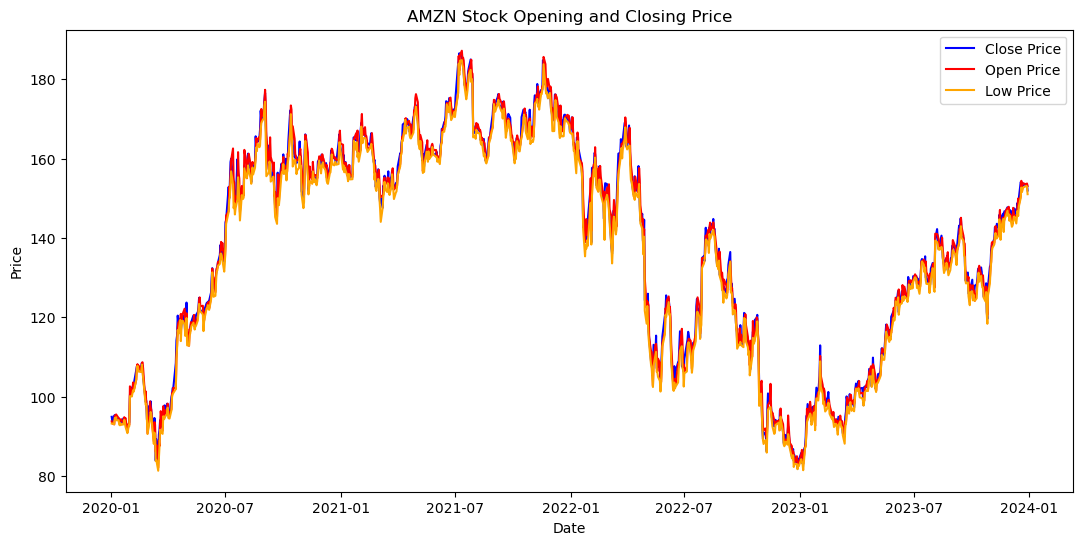

In [93]:
# 📌 Step 4: Visualize Stock Close Price
plt.figure(figsize=(13, 6))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data.index, data['Open'], label='Open Price', color='red')
plt.plot(data.index, data['Low'], label='Low Price', color='orange')
plt.title(f'{ticker_symbol} Stock Opening and Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [95]:
# 📌 Step 5: Feature Engineering & Target Setup
data['SMA_5'] = data['Close'].rolling(window=5).mean()
data['Target'] = data['Close'].shift(-1)

# Drop rows with any missing values
data = data.dropna()

# Reset index to avoid indexing issues
data.reset_index(drop=True, inplace=True)


# Define features and target
features = data[['Open', 'High', 'Low', 'Volume', 'SMA_5']]
target = data['Target']

# 📌 Step 6: Time-Based Train/Test Split
split_index = int(0.8 * len(data))
X_train, X_test = features[:split_index], features[split_index:]
y_train, y_test = target[:split_index], target[split_index:]



print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

Training samples: 800
Testing samples: 201


In [97]:
# 📌 Step 7: Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
print("✅ Linear Regression model trained.")


✅ Linear Regression model trained.


In [99]:
# 📌 Step 8: Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print("✅ Random Forest model trained.")


✅ Random Forest model trained.


In [101]:
# 📌 Step 9: Evaluate the Models
mse_lr = mean_squared_error(y_test, lr_preds)
r2_lr = r2_score(y_test, lr_preds)

mse_rf = mean_squared_error(y_test, rf_preds)
r2_rf = r2_score(y_test, rf_preds)

print("📊 Linear Regression - MSE:", mse_lr, "| R2:", r2_lr)
print("📊 Random Forest    - MSE:", mse_rf, "| R2:", r2_rf)


📊 Linear Regression - MSE: 6.149470395385975 | R2: 0.9742732147528881
📊 Random Forest    - MSE: 9.247061091066014 | R2: 0.9613142043849375


In [137]:
# 📌 Step 10: Combine Predictions (Weighted Average)
combined_preds = 0.4 * lr_preds + 0.6 * rf_preds


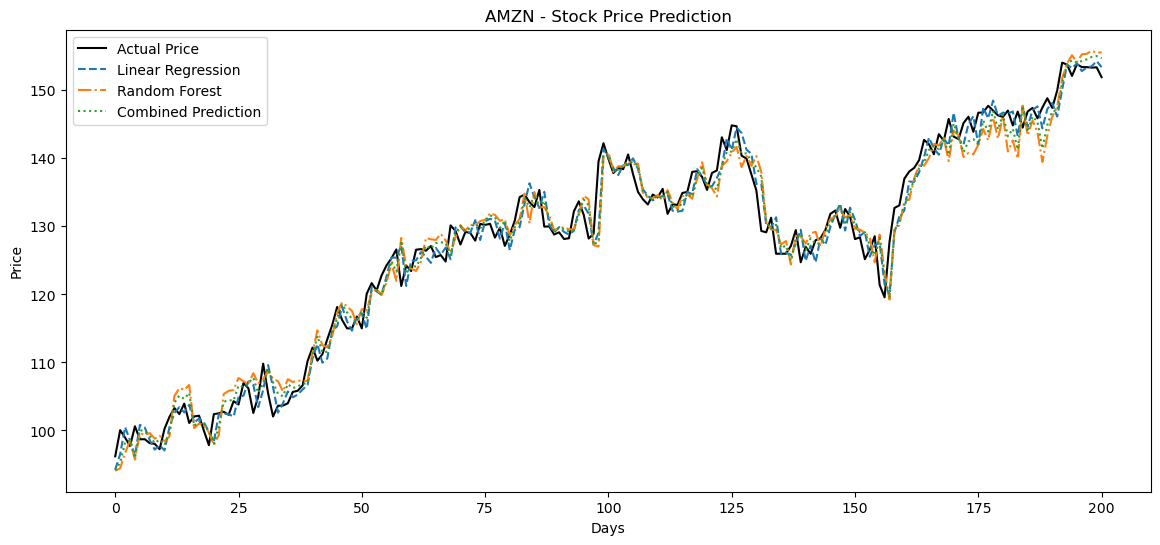

In [139]:

# 📌 Step 11: Visualize Actual vs Predictions
plt.figure(figsize=(14, 6))
plt.plot(y_test.values, label='Actual Price', color='black')
plt.plot(lr_preds, label='Linear Regression', linestyle='--')
plt.plot(rf_preds, label='Random Forest', linestyle='-.')
plt.plot(combined_preds, label='Combined Prediction', linestyle=':')
plt.title(f"{ticker_symbol} - Stock Price Prediction")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()
